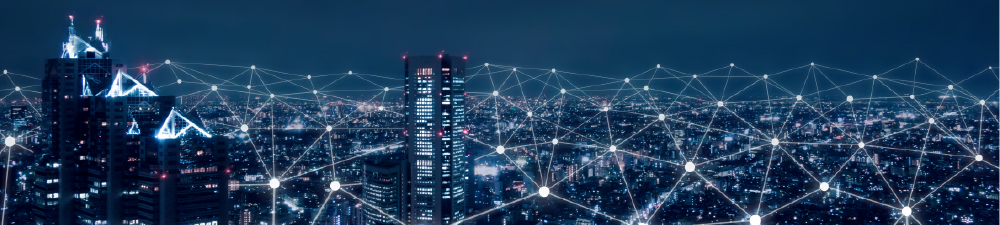

# Mini Project 2 - IU 4.5 Statistical Analysis
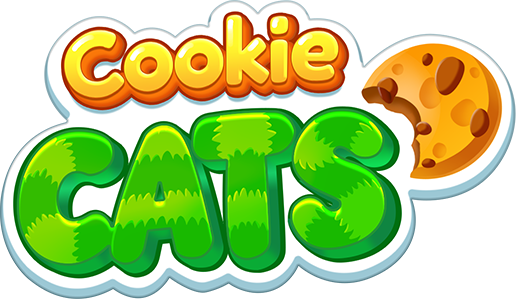

# By: BDA03 Group 5
------------------------------------------------------------------------------------
<br>
<br>

# Background
### Play and complete levels
Cookie Cats is a popular mobile puzzle game where players complete a task and level up.

### Encounter gates
While players complete levels, they encounter gates after completing certain number of levels<br>
(Gates serves the purpose of giving players enforced breaks and drive revenue from in-game purchases)
### Wait at the gate
Gates forces players to wait for sometime before they can play further or make in game purchases.
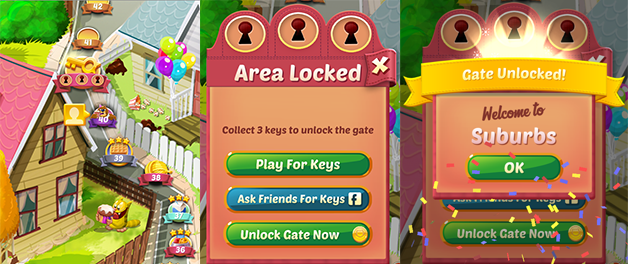
<br>
------------------------------------------------------------------------------------
# Business Problem
Even though Cookie Cats overall popularity is growing over time with players subscribing to try out the game, but,
- Revenue from in-game purchases has been declining over time
- Total number of active players are also declining with players uninstalling the game after playing for a few days.

------------------------------------------------------------------------------------
# Project Objectives
#### Busniess Objective:
Increase YOY revenue from game purchases by increasing retention rate of gamers.
#### Hypothesis:
- Company CEO believes that players are churning because the first gate encountered at level 30 is too early which forces players to wait bfore they can proceed further in the game.
- In order to increase player retention rate, developers ran AB-test by moving the first gate from level 30 to level 40 for some players
    - i.e group A would encounter the gate at level 30
    - And group B would encounter the gate at level 40

------------------------------------------------------------------------------------
# Analytics Objectives
Test CEO's hypothesis to analyze if moving the first gate from level 30 to 40 increase retention rate and number of game rounds played.

------------------------------------------------------------------------------------
# Provided
Data provided for 90,189 players who installed the game while the AB-test was running
Variables & Variable decription
#### User ID
A unique number that identifies each player
#### version
Whether the player was put in the control group A(gate_30 -  a gate at level 30)
or the test group B (gate_40 - a gate at level 40)
#### sum_gamerounds
The number of game rounds played by the player during the first week after installation
#### retention_1 
Did the player come back and play 1 day after installing?
#### retention_7 
Did the player come back and play 7 days after installing?

# Exercise 
1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc)
2. Plot summary statistics and identify trends to answer basis business questions
    - What is the overall 7-day retention rate of the game?
    - How many players never played the game after installing?
    - Does the number of users decreases as the level progresses highlighting the difficulty of the game?
3. Generate cross tab for two players groups to understand the difference in the 1-day and 7-days retention rate and total number of game rounds played.
4. Perform two-sample test for Groups A and B to test statistical significance amongst the groups in the sum of game rounds played. i.e, If group A and B statistically different.
    - Check the assumptions of two sample test
        - Normal distribution (Appl Shapiro test)
        - Homogenity of variance (Apply Levene's Test)
    - Apply the relevant two sample significance test method based on the results form test for normality and homogenity
5. Based on significance testing results, if group A and group B are statistically different, which level has more advantage in terms of player retention?
6. (Bonus Question): Use bootstrap sampling to plot retention rate distribution for both groups to visualise effect of different version of the game on retention.
    

------------------------------------------------------------------------------------

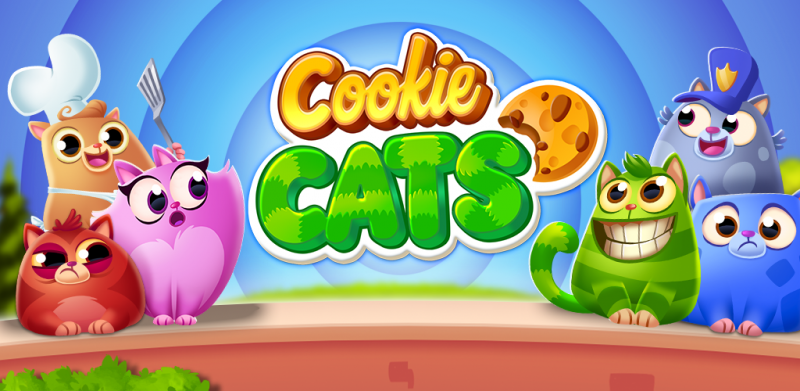

# Packages and setup

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

import math
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import shapiro

%matplotlib inline
sns.set_style("whitegrid")

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Reading data and initial processing

In [3]:
#Read data using pandas
user_df = pd.read_csv("Mini_project_2_Data.xls")

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

#Check dimension of data i.e. # of rows and #column using pandas "shape" funtion
print("Shape of the data i.e. no. of rows and columns")
user_df.shape

#display first 5 rows of the data using "head" function
print("First 5 rows of the raw data:")
user_df.head(5)


Data types for the data set:


userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

Shape of the data i.e. no. of rows and columns


(90189, 5)

First 5 rows of the raw data:


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
#UserId is not a numerical data so we change it to a string to prevent confusion.
user_df['userid'] = user_df['userid'].astype(str)

#Check data types of each column using "dtypes" function
print("Data types for the data set:")
user_df.dtypes

Data types for the data set:


userid            object
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

In [5]:
#understanding the dataset
user_df['sum_gamerounds'].describe()


count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [6]:
# Checking if there are any duplicates
rc = user_df['userid'].value_counts(ascending=False)
duplicate_users = rc[rc > 1].count()
print('There are',str(duplicate_users), 'duplicate users in the dataset.')


There are 0 duplicate users in the dataset.


In [7]:
# Number of players in each group
user_df.groupby('version').count()['userid']

version
gate_30    44700
gate_40    45489
Name: userid, dtype: int64

# Exercise

## Q1. Detect and resolve problems in the data (Missing value, Outliers, etc.)

### Q1.1 Identify missing value

In [8]:
#Check for any missing values in the data using isnull() function
user_df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

## <mark> Group 5 remarks: 
There are no missing values in the data 
    
---------------------------------------------------------------------

### Q1.2 Identify outliers

<Figure size 2000x1000 with 0 Axes>

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

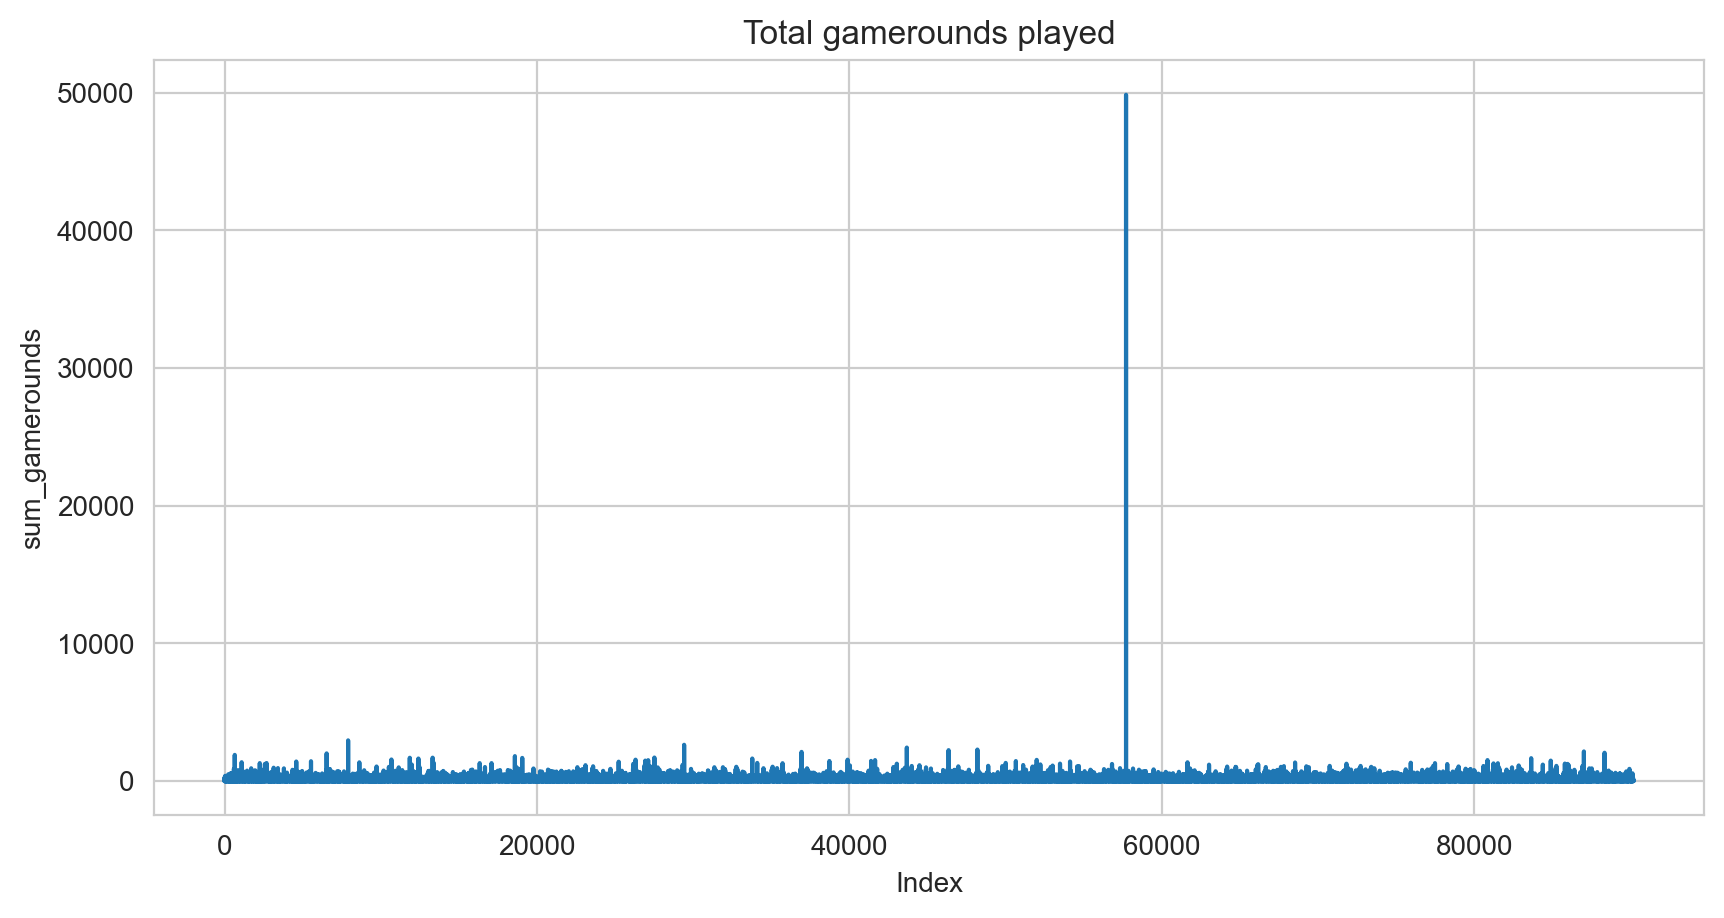

In [9]:
#Check for outlier values in sum_gamerounds column
plt.figure(figsize=(10,5), dpi=200)

plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)
plt.show()

In [10]:
# Identify the user who is an outlier
user_df[user_df['sum_gamerounds']>5000]

,userid,version,sum_gamerounds,retention_1,retention_7
57702,6390605,gate_30,49854,False,True


In [11]:
#Based on the plot, filter out the outlier from sum_gamerounds played; Use max() fucntion to find the index of the outlier
user_df = user_df[user_df['sum_gamerounds'] < user_df['sum_gamerounds'].max()]


## <mark> Group 5 remarks: 
There is one outlier with a sum of 49854 gamerounds.

<Figure size 2000x1000 with 0 Axes>

Text(0.5, 1.0, 'Total gamerounds played')

Text(0.5, 0, 'Index')

Text(0, 0.5, 'sum_gamerounds')

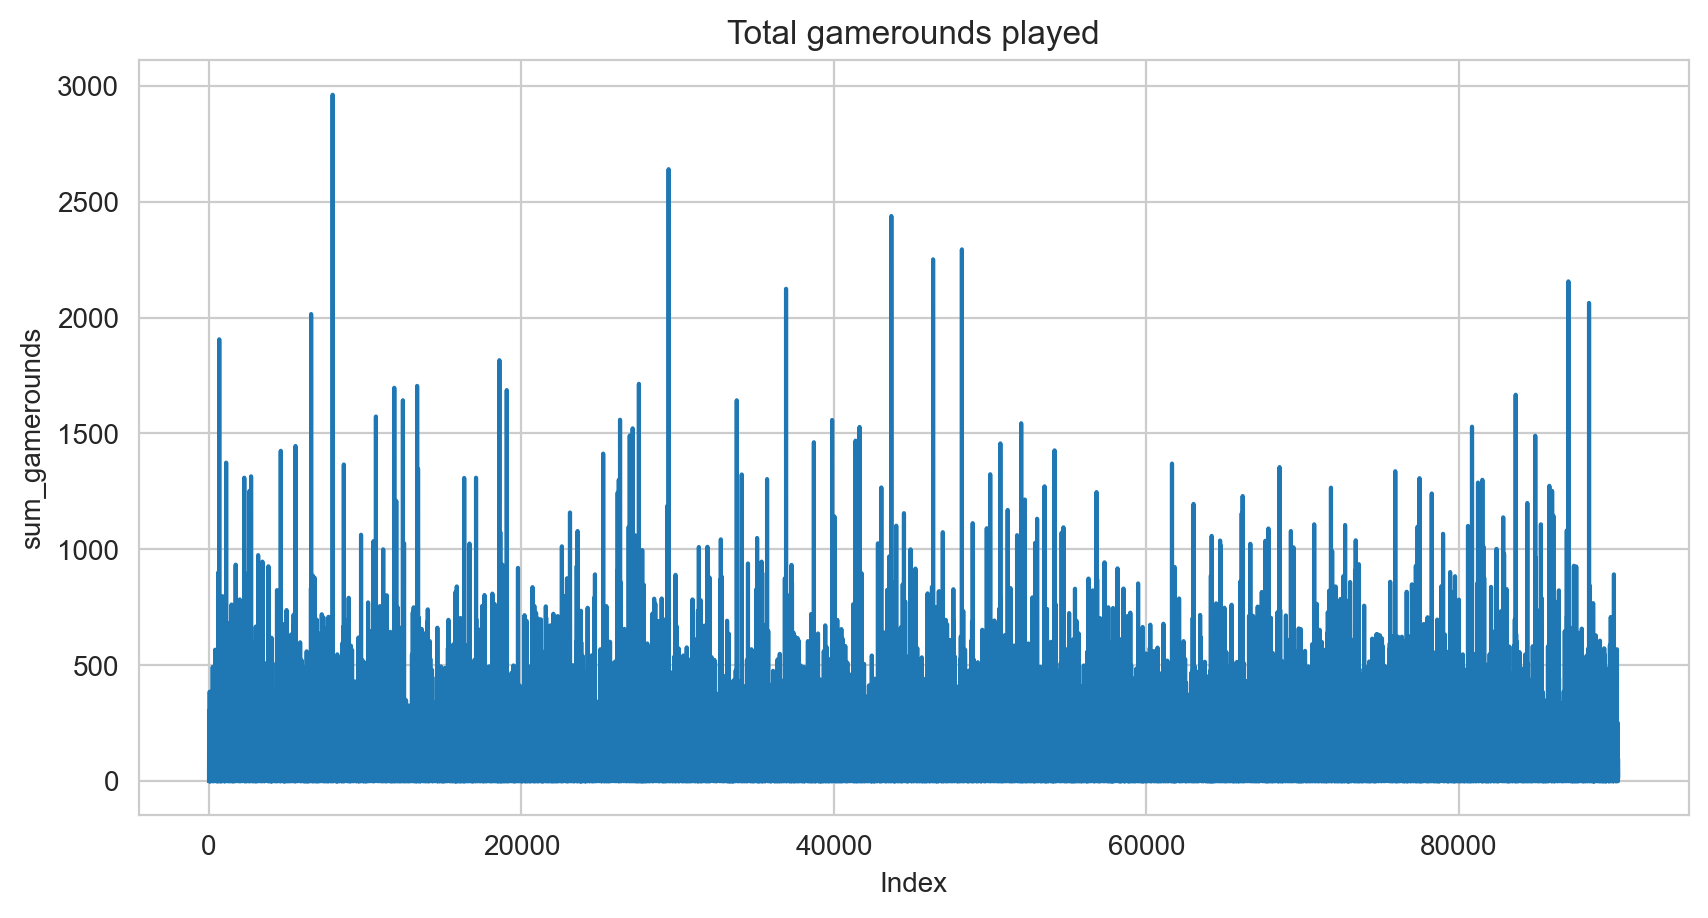

In [12]:
#Plot the graph for sum_gamerounds player after removing the outlier

plt.figure(figsize=(10,5), dpi=200)

plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds")
plt.plot(user_df.sum_gamerounds)
plt.show()

# Alternative method is to use boxplot:

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot:xlabel='sum_gamerounds'>

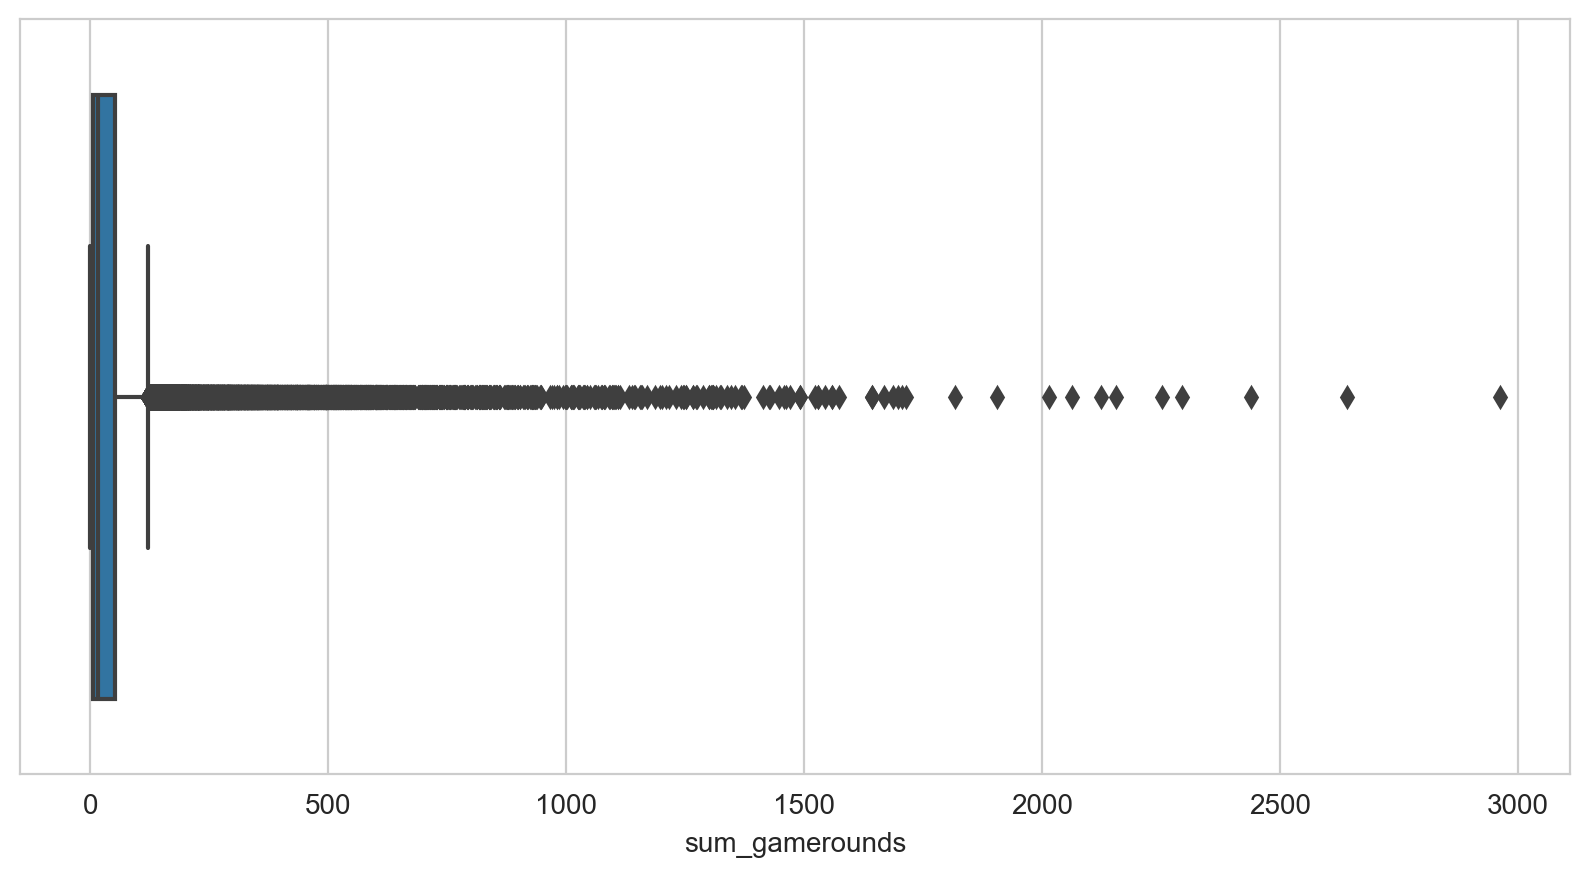

In [13]:
# Using boxplot to check if outlier has been filtered out
plt.figure(figsize=(10,5),dpi=200)
sns.boxplot(data= user_df, x='sum_gamerounds')
plt.show()

## <mark> Group 5 Analysis: 
- Even after removing the sole outlier/ max outlier, from the boxplot, it looks like there is still outliers. <br>
- The outlier has been removed, however, from the boxplot, we can see that there are still many outliers. But for this project, we will only remove the max outlier. <br>

## Alternative method to remove outliers: using 1.5*IQR

46.0


16.0

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot:xlabel='sum_gamerounds'>

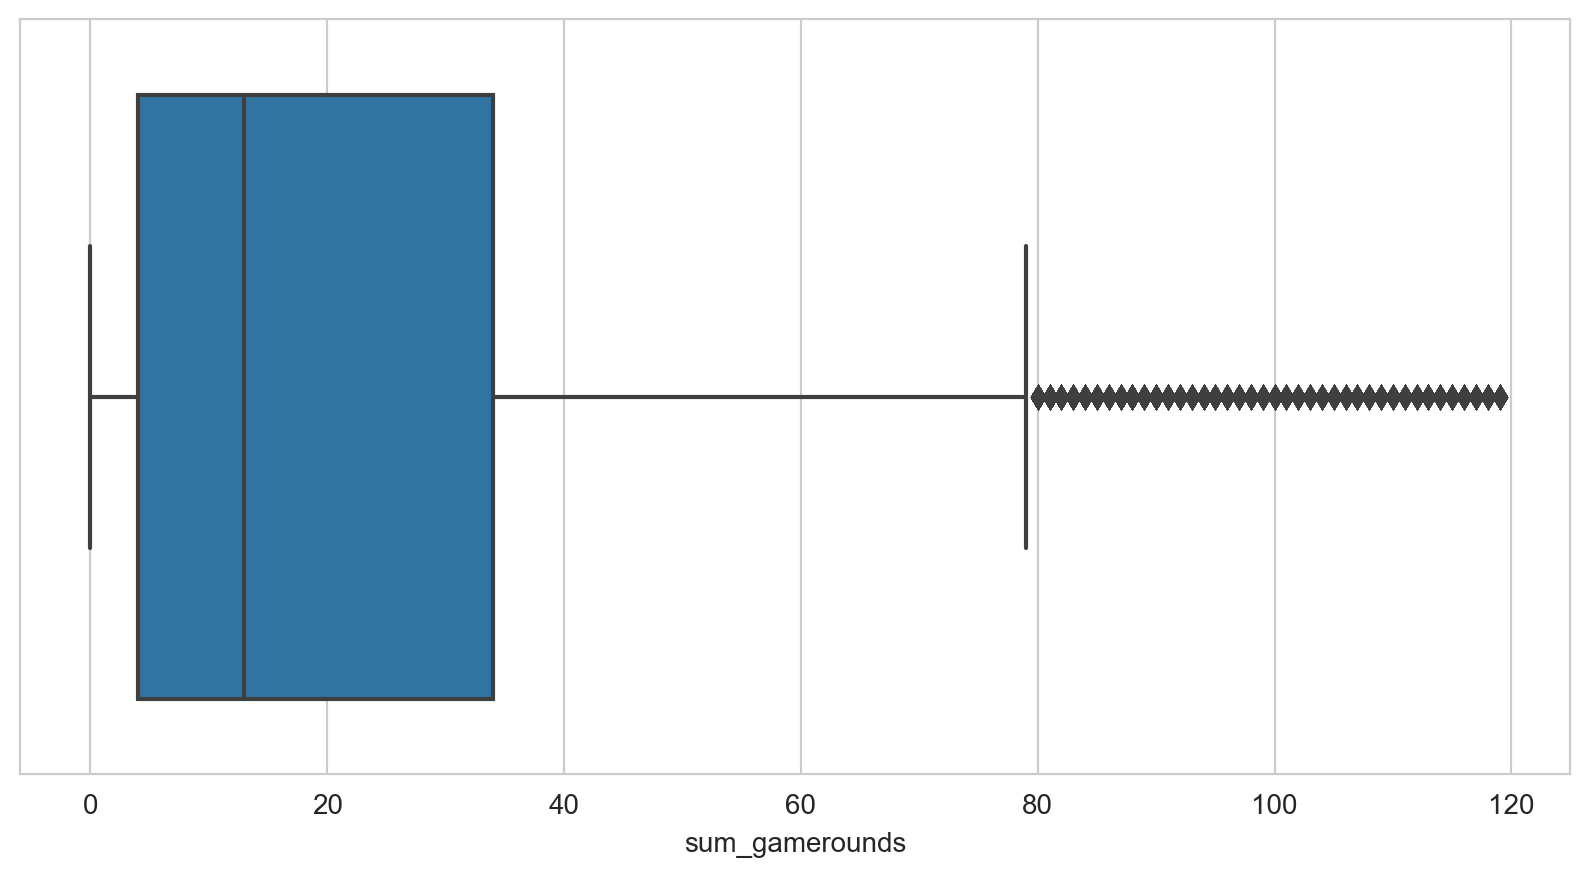

In [14]:
# remove outliers using 1.5*IQR method
# another way to remove outliers 
# but for this project we will just remove the extreme outlier
Q1 = user_df['sum_gamerounds'].quantile(0.25)
Q3 = user_df['sum_gamerounds'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
user_df['sum_gamerounds'].quantile(0.5)

user_df_alt = user_df[(user_df['sum_gamerounds']>(Q1-1.5*IQR)) & (user_df['sum_gamerounds']<(Q3+1.5*IQR))]
#check if outlier has been filtered out
plt.figure(figsize=(10,5),dpi=200)
sns.boxplot(data= user_df_alt, x='sum_gamerounds')
plt.show()

## <mark> Group 5 remarks:
For this project, since only the maximum outlier is to be removed, we will follow with that.

---------------------------------------------------------------------

# Q2. Plot summary statistics and identify trends to answer basis business questions


### Q2.1 What is the overall 7-day retention rate of the game?

In [15]:
#Insert calculation for 7-day retention rate
# we use.sum() because T/F will first be converted to 1/0 then we count the number of 1.
retention_rate_7 = round((user_df['retention_7']).sum()/user_df['retention_7'].count()*100,2)
print("Overall 7 days retention rate of the game for both versions is: " ,retention_rate_7,"%")


Overall 7 days retention rate of the game for both versions is:  18.61 %


<Figure size 2000x1000 with 0 Axes>

<AxesSubplot:xlabel='retention_7', ylabel='count'>

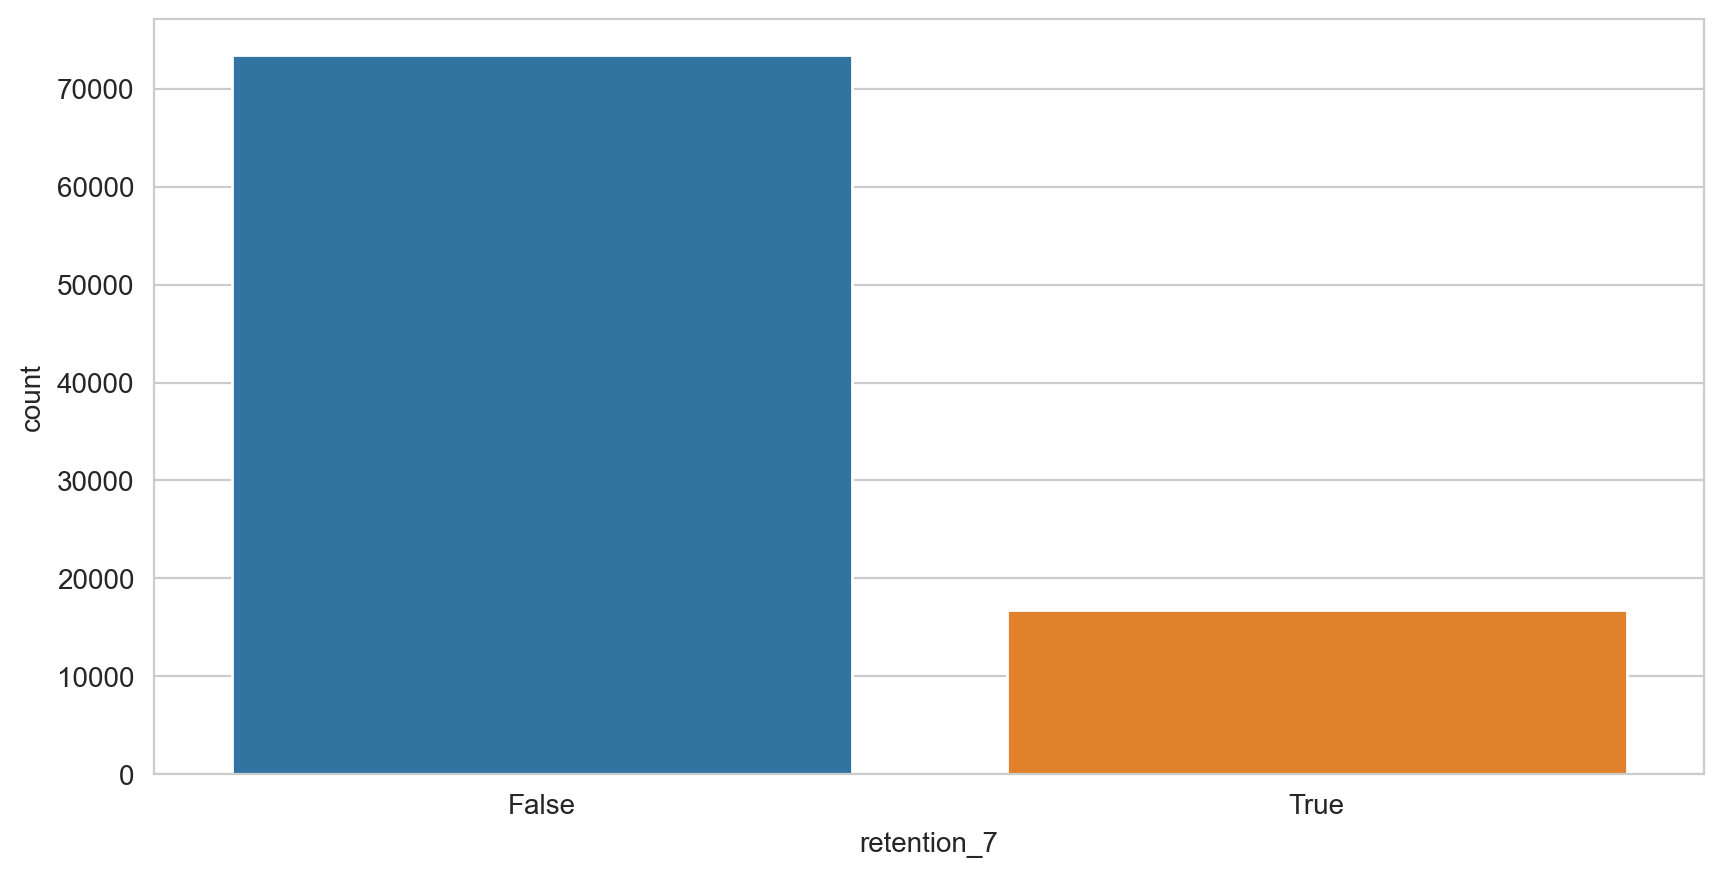

In [16]:
# Visual representation of the number of players that play after 7 days
plt.figure(figsize=(10,5), dpi=200)
sns.countplot(x='retention_7', data= user_df)
plt.show()

### Q2.2 How many players never played the game after installing? 

In [17]:
# Find number of customers with sum_gamerounds is equal to zero
never_play = (user_df['sum_gamerounds']== 0).sum()
print("Total number of players that never play the game after installing:", never_play)



Total number of players that never play the game after installing: 3994


In [18]:
print("Around", str(round(never_play/len(user_df)*100,2)) +'%','of the players do not play the game after installing.')


Around 4.43% of the players do not play the game after installing.


### Q2.3 Does the number of users decrease as the level progresses highlighting the difficulty of the game?

<Figure size 2000x1000 with 0 Axes>

Text(0.5, 1.0, 'The number of users for the first 200 gamerounds in the first week.')

Text(0.5, 0, 'Game Rounds')

Text(0, 0.5, 'User Count')

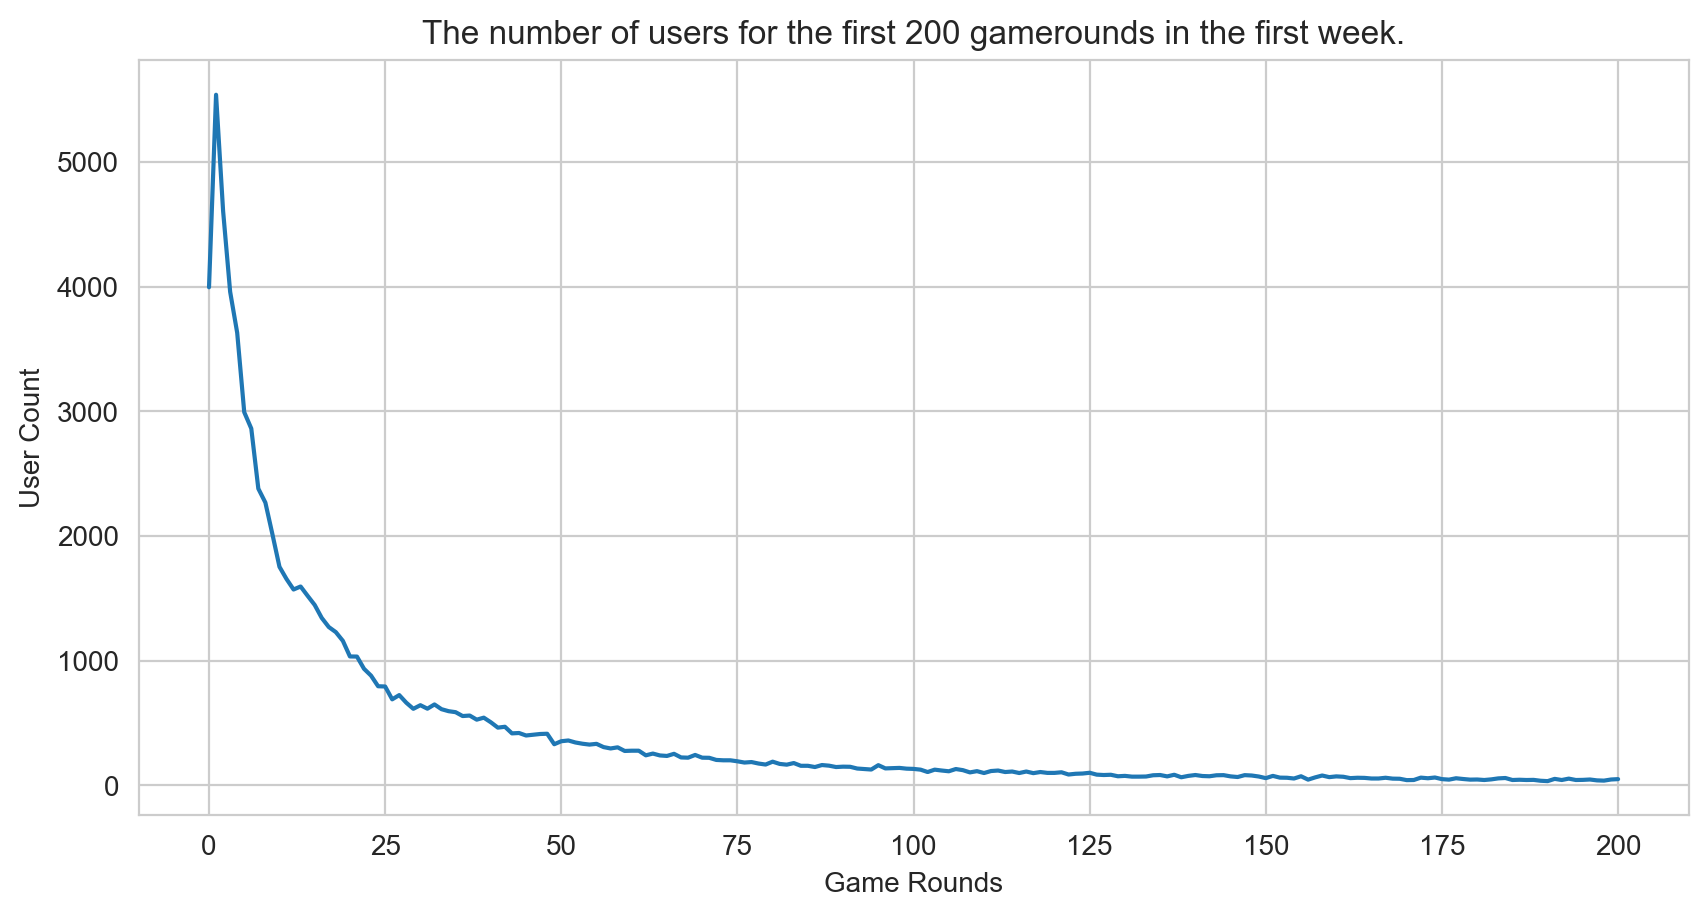

In [19]:
#Group by sum_gamerounds and count the number of users for the first 200 gamerounds
#Use plot() function on the summarized stats to visualize the chart
plt.figure(figsize=(10,5), dpi=200)

plot_df = user_df.groupby('sum_gamerounds')['userid'].count().head(201)

ax = plot_df.plot(x="sum_gamerounds", y="userid")
ax.set_title("The number of users for the first 200 gamerounds in the first week.")
ax.set_xlabel("Game Rounds")
ax.set_ylabel("User Count")
plt.show()

## <mark> Group 5 Analysis: 
- The number of users decreases as the level progresses which would indicate to us that the game is difficult.
- The distribution is highly skewed, with a long tail on the right. 


# Group 5's Additional Analysis: Summary of retention combinations

In [20]:
# NewRetention = retention_1 - retention_7

user_df['NewRetention'] = list(map(lambda x, y: str(x) + '-' + str(y), user_df['retention_1'], user_df['retention_7']))
user_df.groupby(['version', 'NewRetention'])['sum_gamerounds'].agg(['count', 'median', 'mean', 'std', 'max']).reset_index()

,version,NewRetention,count,median,mean,std,max
0,gate_30,False-False,22840,6,11.819746,21.642643,981
1,gate_30,False-True,1825,43,73.169315,93.222330,1072
2,gate_30,True-False,13358,33,49.694490,58.125396,918
3,gate_30,True-True,6676,127,183.886309,189.626390,2961
4,gate_40,False-False,23597,6,11.913294,20.901020,547
5,gate_40,False-True,1773,47,75.261139,94.478048,1241
6,gate_40,True-False,13613,32,50.025490,60.924587,2640
7,gate_40,True-True,6506,133,190.282355,194.220077,2294


## <mark> Group 5 Analysis:
- True-True seem to be most valuable users which can represents "die-hard" fans.
- False-True seem to be more valuable vs. True-False with a higher median number of rounds played, although the low number of count indicates that further engagement with this group might be required.
#### Possible Suggestion: 
- This might indicate engagement efforts to be focused on False-True group vs. True-False, with ideal scenario to increase overall % of True-True users ("die-hard" fans).
- Notification/free tokens can be offered after 7-days of inactivity.
- Prioritise True-True users > False-True users > True-False users > False-False users --- to also see if there are commonalities within these group of users to understand their behaviour and further find lookalikes (for marketing)

------------------------------------------------------------------------------------

## <mark>Group 5 Conclusion
- From .describe(), We observe that:
    - 25% of the players played at most 5 rounds during the first week after installation.
        - This is concerning as 25% of the players stop after only playing 5 rounds (which is normally the easy rounds)
    - 50% of the players played at most 16 rounds during the first week after installation.
    - 75% of the players played at most 51 rounds during the first week after installation.
    <br>
    <br>
- Around 4.5% of the players or 4000 players did not play a single round after installation of the game.
    - They mass downloaded a few games to test out and opted for another game.
    - They may be confused with the gameplay (perhaps too complicated)
    - They may not like the graphics of the game
    - The loading speed may be too slow
    - The selection response may be too slow for the players liking or may not be as responsive. 
    - They may have forgot about installing the game.
    
    
## <mark> Group 5 Suggestions
- Collect player's feedback during the early stage. (e.g. in-app survey for points)
- Competitors analysis with similar games
- Design a more human centred experience for user retention.


---------------------------------------------------------------------

# Q3. Generate crosstab for two groups of players to understand if there is a difference in 7 days retention rate & total number of game rounds played

### Q3.1 Seven days retention rate summary for different game versions

In [22]:
#Create cross tab for game version and retention_7 flag counting number of users for each possible categories

ct=pd.crosstab(user_df.version, user_df.retention_7).apply(lambda r: r/r.sum(), axis=1)
ct

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


<Figure size 500x500 with 0 Axes>

<AxesSubplot:xlabel='retention_7', ylabel='version'>

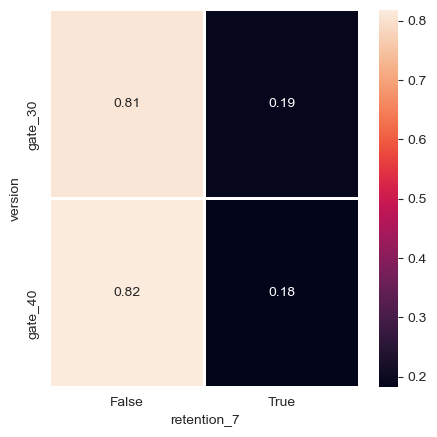

In [23]:
#heatmap of crosstab
plt.figure(figsize=(5,5), dpi=100)
sns.heatmap(ct,linewidths=1, annot= True)
plt.show()

## <mark> Group 5 Analysis Results:
    
- There is a large percentage of players not returning to play the game after 7 days for both gate_30 and gate_40
- The gate locality does not strongly influence the user's retention rate after 7 days of installation as both is approximately 0.81.

### Q3.2 Gamerounds summary for different game versions

In [24]:
#use pandas group by to calculate average game rounds played summarized by different versions
round(user_df.groupby('version')['sum_gamerounds'].mean(),2)


version
gate_30    51.34
gate_40    51.30
Name: sum_gamerounds, dtype: float64

## <mark> Group 5 Analysis Results:
    
Do total number of gamerounds played in total by each player differ based on  different versions of the game? 

#### Conclusion: 
No, there is no significant difference in total number of gamerounds in average by each player based on different version of the game.

## Q4. Perform two-sample test for groups A and B to test statistical significance amongst the groups in the sum of game rounds played i.e., if groups A and B are statistically different

### Initial data processing

In [25]:
#Define A/B groups for hypothesis testing
user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")
group_A=pd.DataFrame(user_df[user_df.version=="A"]['sum_gamerounds'])
group_B=pd.DataFrame(user_df[user_df.version=="B"]['sum_gamerounds'])

#group_A = user_df[user_df['version'] == "A"]["sum_gamerounds"]
#group_B = user_df[user_df['version'] == "B"]["sum_gamerounds"]

In [26]:
group_A

,sum_gamerounds
0,3
1,38
6,0
11,0
13,39
...,...
90179,14
90180,7
90182,21
90183,10


In [27]:
group_B

,sum_gamerounds
2,165
3,1
4,179
5,187
7,2
...,...
90181,10
90184,97
90185,30
90187,51


### Q4.1 Shapiro test of Normality

### 1) Shapiro Test

In [28]:
#---------------------- Shapiro Test ----------------------
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

# Create an interpretation function
alpha = 0.05
def p_test(p):
    if p > alpha:
        print('Distribution is Normal (fail to reject H0)')
    else:
        print('Distribution is not Normal (reject H0)')

#test for group_A (attan p-value)
p_A = shapiro(group_A)[1]

#test for group_B (attan p-value)
p_B = shapiro(group_B)[1]


# Run the hypothesis
print("Shapiro Test of Normality:")
print("H0: Distribution is normal")
print("H1: Distribution is not normal\n\n")
print('p-value of group_A:',p_A)
p_test(p_A)
print('p-value of group_B:',p_B)
p_test(p_B)

Shapiro Test of Normality:
H0: Distribution is normal
H1: Distribution is not normal


p-value of group_A: 0.0
Distribution is not Normal (reject H0)
p-value of group_B: 0.0
Distribution is not Normal (reject H0)


### 2) Using QQ-plot

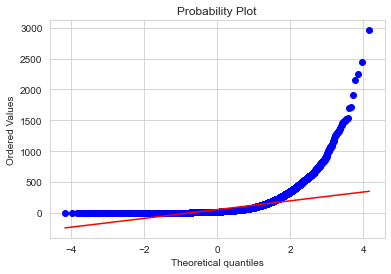

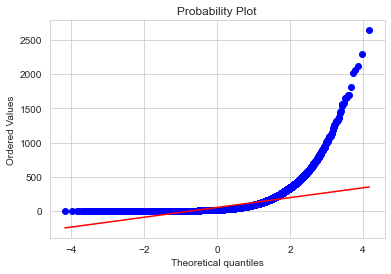

In [29]:
#QQ-plot to check the normality of the distribution  
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(group_A['sum_gamerounds'], plot=plt)
plt.show()


fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(group_B['sum_gamerounds'], plot=plt)
plt.show()

#### From the QQ-plot, we can observe that the distribution is far from normal.

## <mark> Group 5 Analysis Results:
    
__Type your answer here:__ Analyze and interpret the results of shapiro test of normality i.e. are the two groups normally distributed?

#### Conclusion: 
1. Shapiro Test
- Both p-value is less than 5% so we reject the null hypothesis and conclude that there is sufficient evidence at 5% level of significance that both group_A and group_B is not normally distributed.
2. QQ-Plot
- The distribution is far from normal.

Will have to use non-parametric test for two sample t-test later.

### Q4.2 Test of homogienity of variance

In [30]:
#---------------------- Levene's Test ----------------------
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

# Create an interpretation function
alpha = 0.05
def equal_variance(p):
    if p > alpha:
        print('group_A and group_B does look like they have equal variances \n(fail to reject H0)')
    else:
        print('group_A and group_B does not look like they have equal variances  \n(reject H0)')

# Run the Hypothesis
print("A/B hypotheses testing:")
print("H0: A == B")
print("H1: A != B", "\n")

#perform levene's test and accept or reject the null hypothesis based on the results
stat, p = levene(group_A['sum_gamerounds'], group_B['sum_gamerounds'])
print('stat:', round(stat,3))
print('p:', round(p, 3))


equal_variance(p)

A/B hypotheses testing:
H0: A == B
H1: A != B 

stat: 0.075
p: 0.784
group_A and group_B does look like they have equal variances 
(fail to reject H0)


## <mark> Group 5 Analysis Results:
    
__Type your answer here:__ Write your final recommendation from the results of Levene's test
    <br>
    <br>
#### Conclusion: 
p-value = 0.784 suggest that group_A and group_B has equal variances.

### Q4.3 Test of significance: Two sample test

In [31]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different


#Apply relevant two sample test to accept or reject the NULL hypothesis

# Create an interpretation function
alpha = 0.05
def two_sample_test(p):
    if p > alpha:
        print('group_A and group_B does look equal (fail to reject H0)')
    else:
        print('group_A and group_B does not look equal (reject H0)')

# Run the Hypothesis
print("A/B hypotheses testing:")
print("H0: A == B")
print("H1: A != B", "\n")

# Non-Parametric Test as distribution not normal
# The Mann-Whitney U test is a non-parametric version of the t-test for independent samples.
ttest = stats.mannwhitneyu(group_A['sum_gamerounds'], group_B['sum_gamerounds'])[1]
print('p-value:', ttest)


two_sample_test(ttest)

A/B hypotheses testing:
H0: A == B
H1: A != B 

p-value: 0.02544577639572688
group_A and group_B does not look equal (reject H0)


## <mark> Group 5 Analysis Results:
    
__Type your answer here:__ Write your final recommendation from the results of two sample hyothesis testing
    <br>
    <br>
#### Conclusion: 
- Since p-value = 0.02544577 < 0.05, we reject the null hypothesis and conclude that there is sufficient evidence at 5% significance level that the two samples, group_A and group_B, not equal.
- Difference in A/B is statistically significant
- There are statistically significant difference between two groups about moving first gate from level 30 to level 40 for game rounds.


## Q5. Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

In [37]:
#Analyze the 1 day and 7 days retention rate for two different groups using group by function
#Define A/B groups for hypothesis testing

# retention_1
print('retention_1')
r1 = user_df.groupby('version')['retention_1'].mean()
r1
# retention_7
print('-----------------------------------')
print('retention_7')
r2 = user_df.groupby('version')['retention_7'].mean()
r2
# number of gamerounds played
print('-----------------------------------')
print('number of gamerounds played')
user_df.groupby('version')['sum_gamerounds'].mean()




#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: The average difference between average number of gamerounds the users play is 0.
# ALTERNATE Hypothesis H1: The average difference between average number of gamerounds the users play is not equal 0.


#Apply relevant two sample test to accept or reject the NULL hypothesis
# Create an interpretation function
alpha = 0.05
def ttest(p):
    if p > alpha:
        print('There is no difference between the gate being at level_30 than at level_40 (fail to reject H0)')
    else:
        print('There is a difference between the gate being at level_30 than at level_40(reject H0)')

# Run the Hypothesis
print('-----------------------------------')
print("A/B hypotheses testing:")
print("H0: A-B == 0")
print("H1: A-B != 0", "\n")

#create the dataframe
ra = user_df[user_df['version'] == 'A'][['sum_gamerounds','retention_1','retention_7']]
rb = user_df[user_df['version'] == 'B'][['sum_gamerounds','retention_1','retention_7']]

# retention 1
r1_tt = stats.mstats.ttest_ind(rb['retention_1'], ra['retention_1'], equal_var=False)[1]
print("retention_1: P-value is " + str(round(r1_tt,3)))
ttest(r1_tt)
print(' ')


# retention 7
r7_tt = stats.mstats.ttest_ind(rb['retention_7'], ra['retention_7'], equal_var=False)[1]
print("retention_7: P-value is " + str(round(r7_tt,3)))
ttest(r7_tt)

retention_1


version
A    0.448198
B    0.442283
Name: retention_1, dtype: float64

-----------------------------------
retention_7


version
A    0.190183
B    0.182000
Name: retention_7, dtype: float64

-----------------------------------
number of gamerounds played


version
A    51.342111
B    51.298776
Name: sum_gamerounds, dtype: float64

-----------------------------------
A/B hypotheses testing:
H0: A-B == 0
H1: A-B != 0 

retention_1: P-value is 0.074
There is no difference between the gate being at level_30 than at level_40 (fail to reject H0)
 
retention_7: P-value is 0.002
There is a difference between the gate being at level_30 than at level_40(reject H0)


## <mark> Group 5 Analysis Results:__
  
__Type your answer here:__ Write your final recommendation from the results of two sample hypothesis testing
    <br>
#### retention_1
From the means:
- There appears to be a slight decrease in 1-day retention when the gate was moved to level 30 (44.8%) compared to level 40 (44.2%).
- Although it is a small difference, the small difference in retention can have a huge revenue impact.<br>
From the p-value:
- From the above test in difference of means, p-value = 0.074 > alpha = 0.05 indicates that there is insufficient evidence to conclude that there is a statistical difference between the mean of 1-day retention rate in level 30 gate (A) vs. level 40 gate (B)    

#### retention_7
From the means:
- There appears to be a slight decrease in 7-day retention when the gate was moved to level 30 (19.0%) compared to level 40 (18.2%). <br>
From the p-value:
- From the above test in difference of means, p-value = 0.002 < alpha = 0.05 indicates that there is a statistical difference between the mean of 7-day retention rate in level gate (A) vs. level 40 gate (B)

                                                                     
- The difference is larger than retention_1, this is probably because players have more time to hit the first gate
- However, the overall retention_7 is lower than the overall retention_1, this is probably because there are fewer players playing the game after 7 days of installation than a day after installation.


## <mark> Group 5 recommendations:__    
We may not be certain with these retention numbers in the future hence we should use bootstrap analysis to ensure the certainty.
<br>
By doing so, we can continuously re-sample out dataset and calculate the retention_1 and retention_7 for these samples. The variations in retention_1 and retention_7 will give us an overview of the certainty of the retention numbers.

So, in Q6, We will use bootstrap analysis to determine how certain we should be of the difference between the AB-groups.

## Q6. [Bonus Question]  Using bootstrap resampling, plot the retention rate distribution for both the groups inorder to visualize effect of different version of the game on retention.

version
A    0.448198
B    0.442283
dtype: float64

<AxesSubplot:ylabel='Density'>

version
A    0.190183
B    0.182000
dtype: float64

<AxesSubplot:ylabel='Density'>

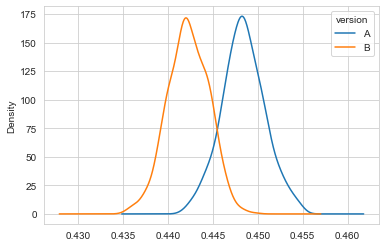

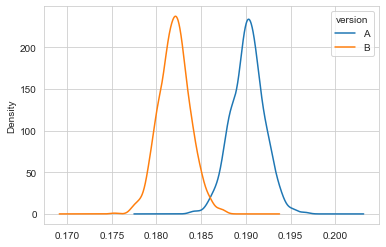

In [33]:
#Hint: Plot density function
# Calculating 1-day retention for group_A and group_B
user_df.groupby('version')['retention_1'].sum() / user_df.groupby('version')['userid'].count()

# Creating an list with bootstrapped means for group_A and group_B
boot_1d = []
for i in range(1000):
    boot_mean = user_df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transform the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# Plot the Kernel Density Estimate of the bootstrap distributions
boot_1d.plot(kind='kde')


# Calculating 7-day retention for group_A and group_B
user_df.groupby('version')['retention_7'].sum() / user_df.groupby('version')['userid'].count()

# Creating an list with bootstrapped means for group_A and group_B
boot_7d = []
for i in range(1000):
    boot_mean = user_df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Transform the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)
    
# Plot the Kernel Density Estimate of the bootstrap distributions
boot_7d.plot(kind='kde')

Text(0.5, 1.0, '% difference in 1-day retention between the two AB-groups')

Probability that 1-day retention is greater when the gate is at level 30: 0.967


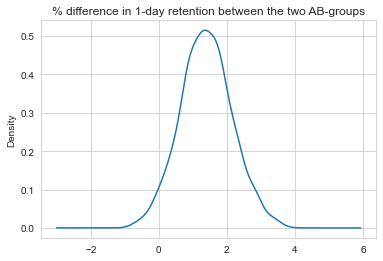

In [34]:
# retention_1
# Adding a column with the percentage difference between the group_A and group_B
boot_1d['diff'] = (boot_1d['A'] - boot_1d['B'])/boot_1d['B']*100

# Plot the bootstrap percentage difference
ax = boot_1d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between the two AB-groups')

# Calculating the probability that 1-day retention is greater when the gate is at level 30
print('Probability that 1-day retention is greater when the gate is at level 30:',(boot_1d['diff'] > 0).mean())

## <mark> Group 5 Analysis Results:
From this chart, we can observe that: <br>
More than 97% chance that an average of 1000 randomly chosen sample will skew towards having a gate at Level 30 than at Level 40.

Text(0.5, 1.0, '% difference in 7-day retention between the two AB-groups')

Probability that 7-day retention is greater when the gate is at level 30: 0.999


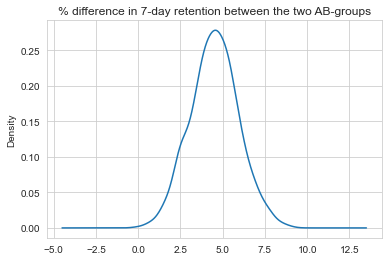

In [35]:
# retention_7
# Adding a column with the percentage difference between the group_A and group_B
boot_7d['diff'] = (boot_7d['A'] - boot_7d['B'])/boot_7d['B']*100

# Plot the bootstrap percentage difference
ax = boot_7d['diff'].plot(kind='density')
ax.set_title('% difference in 7-day retention between the two AB-groups')

# Calculating the probability that 1-day retention is greater when the gate is at level 30
print('Probability that 7-day retention is greater when the gate is at level 30:',(boot_7d['diff'] > 0).mean())

## <mark> Group 5 Analysis Results:
From this chart, we can observe that: <br>
Almost certainly an average of 1000 randomly chosen sample will skew towards having a gate at Level 30 than at Level 40.

## <mark>Group 5 Conclusion:
Since group A and B are statistically different and bootstrap sampling result indicate strong skew towards Group A, setting the gate at Level 30 resulted in higher retention rate than setting gate at Level 40.  
    
## <mark> Group 5 Suggestions:
CEO's hypothesis is rejected. CEO should not move first gate from Level 30 to Level 40, for higher retention rate overall.


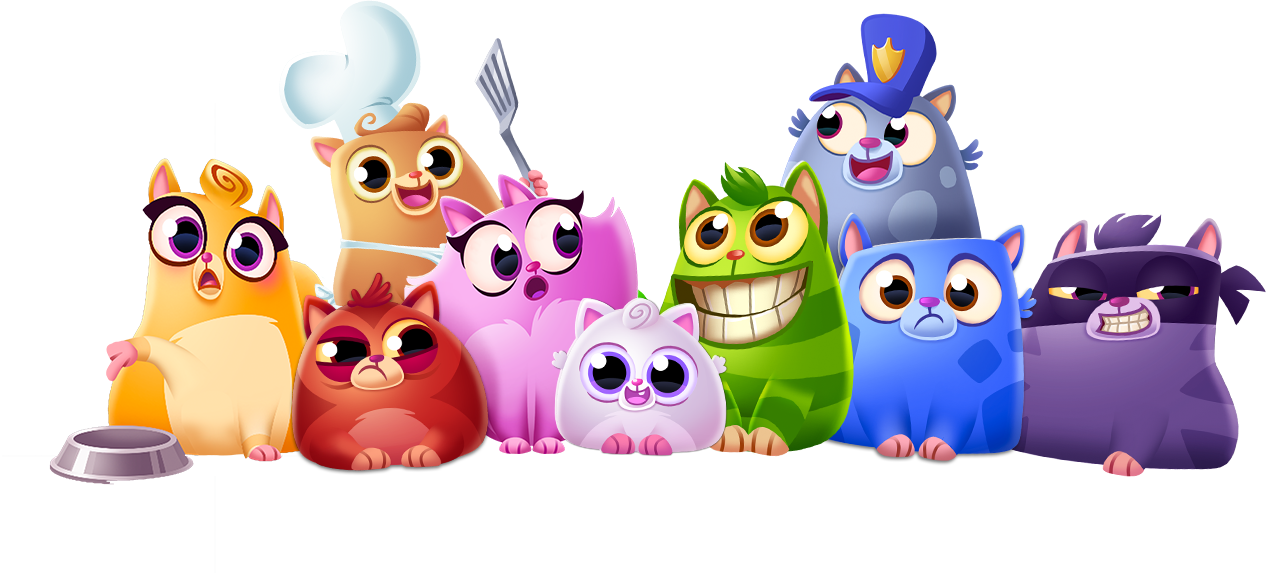

## <mark> Group 5 Project overall analysis and suggestion to CEO
#### Overall Analysis:
- From Q1 to Q3, we explore and understand the relationships and structure of the data. The analysis we got were:
    - There were no missing values
    - There was one outlier
    - Summary statistics and plots helped us understand the data, distribution and problem.
    - 25% of the players played at most 5 rounds during the first week after installation.
    - 50% of the players played at most 16 rounds during the first week after installation.
    - 75% of the players played at most 51 rounds during the first week after installation.
    - Around 4.5% of the players or 4000 players did not play a single round after installation of the game.
    - From our additional analysis:
       - We identify True-True users as the highest value group with highest median number of rounds played.
       - We identify False-True as more valuable than True-False (i.e. users who did not come back after 1-day but came back after 7-days vs. users who came back after 1-day but not after 7-days, respectively) with a higher median number of rounds played
       - We observed that False-True has a lower count than True-False which might indicate a need for intervention/incentivization for this group of users
    
    <br>
    <br>
- For Q4 and Q5, we applied A/B testing and analyze the analysis results. The analysis we got were:
    - Shapiro Testing rejected H0 for Normality assumption and QQ-plot shows non-normal plot which indicates that we needed to apply Non-parametric test called: Mann Whitney U.
    - The two groups has eqal variance.
    - By using Mann Whitney U Testing, we rejected H0 hypothesis and conclude that A/B groups are not similar.
    <br>
    <br>
- For Q6, we did bootstrap analysis to determine which level has more advantage in terms of player retention and number of game rounds played. The analysis we got were:
    - 1-day and 7-day average retention are higher when the gate is at level 30 than at level 40.
    
#### Suggestion to CEO:
- Collect player's feedback during the early stage. (e.g. in-app survey for points)
- Competitors analysis with similar games
- HCD the tutorial or run through of games to determine painpoints of users.
- Do not move gate from level 30 to level 40.
- Focus engagement efforts on False-True vs. True-False users as they have a higher # of rounds played. Example: notification/free tokens after 7-days of inactivity